# Analizing Paris debts

We know that Paris, as most of the cities, own debts. Thoses depts can me accessed via the opendata.paris.fr website

we propose here to read those data, and see what we can lean from it

In [142]:
#import all of the useful libs
import requests
import json
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [143]:
url="".join(["https://opendata.paris.fr/api/records/1.0/download/?",
            "dataset=dette-propre&lang=fr",
            "&format=json",
            #"&rows=0",
            "&facet=annee_de_publication",
            "&facet=nature",
            "&facet=organisme_preteur_ou_chef_de_file",
            "&facet=type_de_taux_d_interet",
            "&facet=profil_d_amortissement",
            "&facet=possibilite_de_remboursement",
            "&facet=categorie_d_emprunt"])
req = requests.get(url).json()

### The type of data :

* req is a list of json objects. Each item being a data point. we have 524 items
* req[i] has 4 keys : 'datasetid','fields','record_timestamp','recordid'. only 'fields' is the useful data
* req[i]["fields"] has 14 keys :
  * 'date_de_derniere_echeance',
  * 'capital_restant_du_au_31_12_2016',
  * 'organisme_preteur_ou_chef_de_file',
  * 'nature',
  * 'capital_initial',
  * 'date_d_emission_ou_date_de_mobilisation',
  * 'profil_d_amortissement',
  * 'taux_initial_taux_actuariel',
  * 'taux_initial_niveau_de_taux',
  * 'possibilite_de_remboursement',
  * 'type_de_taux_d_interet',
  * 'annee_de_publication',
  * 'categorie_d_emprunt',
  * 'index'



In [144]:
#exemple of one item :
for k in req[1]['fields'].keys():
    print('{:40} :  {}'.format(k,req[1]['fields'][k]))

date_de_derniere_echeance                :  2008-12-01
capital_restant_du_au_31_12_2016         :  38112254.31
organisme_preteur_ou_chef_de_file        :  CREDIT FONCIER
nature                                   :  16441 - Emprunts option tirage tréso
capital_initial                          :  55643891.29
date_d_emission_ou_date_de_mobilisation  :  2001-12-21
profil_d_amortissement                   :  Emprunt in fine
taux_initial_taux_actuariel              :  0.0
taux_initial_niveau_de_taux              :  0.0
possibilite_de_remboursement             :  oui
type_de_taux_d_interet                   :  Fixe
annee_de_publication                     :  2007
categorie_d_emprunt                      :  A-1
index                                    :  TAUX FIXE


In [145]:
#What is to total depts ?
for i,r in enumerate(req):
    #print(r['fields']['capital_restant_du_au_31_12_2016'])
    pass

cap_rest = [r['fields']['capital_restant_du_au_31_12_2016'] for r in req]

print(" \n \n capital total restant le 31_12_2016 : {:4.2f} milliard d'€ !! \n".format(sum(cap_rest)/1e9))

 
 
 capital total restant le 31_12_2016 : 32.52 milliard d'€ !! 



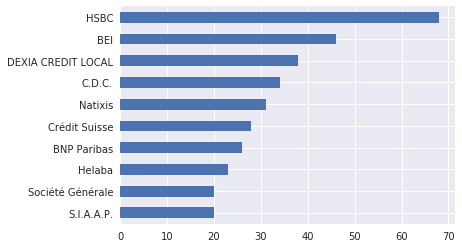

In [156]:
#who are the bigests lowner ? In numbers of loans
df = pd.DataFrame([r['fields'] for r in req])
df['organisme_preteur_ou_chef_de_file'].value_counts(ascending=True)[-10:].plot.barh()

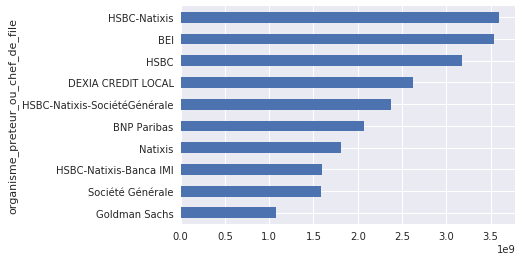

In [155]:
#who are the bigests lowner ? In totla inital capital
key='capital_initial'
gbdf = df.groupby(['organisme_preteur_ou_chef_de_file'])[key].sum().sort_values()[-10:].plot.barh()